Loading file twitter_stream_15000tweets.txt, which has worldwide tweets.
Note: Refer twitter_streaming.py for the code used to load tweets using streaming API into the txt file


Information:
delete tweets: tweets which are tagged delete by Twitter API
limit tweet tags: Twitter streaming gives some limit tags along with tweets while filtering based on coordinates
proper tweets: tweets excluding the (delete+limit) tweets, which contain proper Text field


Total number of Tweets: 15000
Total number of proper tweets : 13239


Question 2(a)
Percentage of tweets with langId (in total tweets): 88.26
Percentage of tweets with langId(in proper tweets): 100.0




Question 2(b)
Total number of languages tags provided by twitter API: 39


Question 2(c)
Percentage of each language tag(by twitter API):
{   u'ar': 9.10944935418083,
    u'bg': 0.007553440592189742,
    u'cs': 0.07553440592189742,
    u'cy': 0.06042752473751794,
    u'da': 0.022660321776569226,
    u'de': 0.2492635395422615,
    u'el'

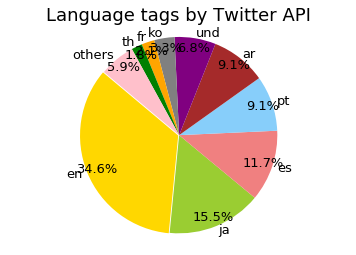

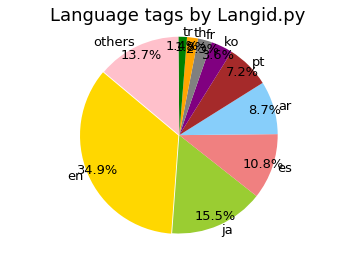

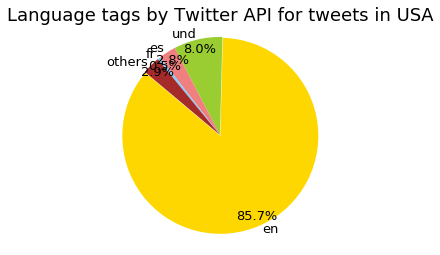

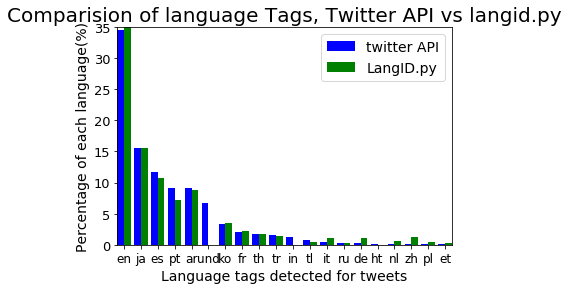

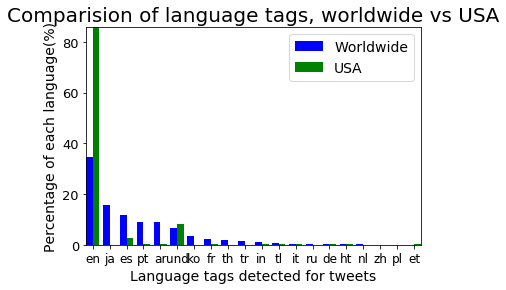

In [3]:
from __future__ import print_function

try:
    import json
except ImportError:
    import simplejson as json
    
from collections import Counter
import operator
import numpy as np
import matplotlib.pyplot as plt
from pylab import title
import pprint
import langid
import matplotlib

tweets_considered=15000

print('Loading file twitter_stream_15000tweets.txt, which has worldwide tweets.')
print('Note: Refer twitter_streaming.py for the code used to load tweets using streaming API into the txt file')
print('\n')

#Counting the deleted and proper tweets in 15000 tweets stored in file
tweets_filename = 'twitter_stream_15000tweets.txt'
tweets_file = open(tweets_filename, "r")
tweet_count = tweets_considered
delete_count,geo_enabled_count,proper_tweets,tweets_with_langID=0,0,0,0
languages_twitter_api=[]
languages_langid=[]

#langid predictions
langid_mismatch=[]
langid_match=[]

for line in tweets_file:
    tweet_count -= 1    
    try:
        tweet = json.loads(line.strip())
        
        #counting delete tags
        if 'delete' in tweet:
            delete_count+=1
            
        #counting proper tweets
        elif 'text' in tweet:
            if 'lang' in tweet.keys():
                tweets_with_langID+=1
                languages_twitter_api.append(tweet['lang'])
                
            #langid prediction
            langid_prediction=langid.classify(tweet['text'])[0]
            languages_langid.append(langid_prediction)
            if langid_prediction!=tweet['lang']:
                langid_mismatch.append((tweet['text'],tweet['lang'],langid_prediction))
            else:
                langid_match.append((tweet['text'],tweet['lang'],langid_prediction))
            
            ##Geotagging count
            if tweet['user']['geo_enabled']:
                geo_enabled_count+=1
                
            proper_tweets+=1
        
        else:
            #print('Other kind of tweets from API',tweet.keys())
            pass

    except Exception as e:
        # read in a line is not in JSON format (sometimes error occured)
        print("error",e,line)
        continue
        
    finally:
        if tweet_count <= 0:
            break 
            

print('Information:')
print('delete tweets: tweets which are tagged delete by Twitter API')
print('limit tweet tags: Twitter streaming gives some limit tags along with tweets while filtering based on coordinates')
print('proper tweets: tweets excluding the (delete+limit) tweets, which contain proper Text field')

print('\n')
print('Total number of Tweets:',tweets_considered)
print('Total number of proper tweets :',proper_tweets)

print('\n')
print('Question 2(a)')
print("Percentage of tweets with langId (in total tweets):",float(tweets_with_langID*100.0/tweets_considered))
print("Percentage of tweets with langId(in proper tweets):",float(tweets_with_langID*100.0/proper_tweets))

##finding the percentage of each language tag provided by Twitter API
print('\n')
language_count_twitter_api=Counter(languages_twitter_api)
language_percentage_twitter_api={}
s = sum(language_count_twitter_api.values())
for k, v in language_count_twitter_api.items():
    pct = v * 100.0 / s
    language_percentage_twitter_api[k]=pct

print('\n')
print('Question 2(b)')
print('Total number of languages tags provided by twitter API:',len(language_percentage_twitter_api.keys()))
print('\n')
print('Question 2(c)')
print('Percentage of each language tag(by twitter API):')
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(language_percentage_twitter_api)


##finding the percentage of each language tag provided by Langid.py
print('\n')
language_count_langid=Counter(languages_langid)
language_percentage_langid={}
s = sum(language_count_langid.values())
for k, v in language_count_langid.items():
    pct = v * 100.0 / s
    language_percentage_langid[k]=pct

print('Question 3(a)')
print('Total number of languages tags provided by Langid API:',len(language_percentage_langid.keys()))


##Langid vs Twitter API
print('\n')
print('Question 3(b)')
print('Total number of mismatches between Langid and twitter API:',len(langid_mismatch))
print('Total number of matches between Langid and twitter API:',len(langid_match))
print('percentage of langid vs twitter API mis-matches( in proper tweets):',float(len(langid_mismatch)*100.0/proper_tweets))
print('percentage of langid vs twitter API matches( in proper tweets):',float(len(langid_match)*100.0/proper_tweets))

print('\n')
print('Question 3(c)')
print('The twitter API and langid.py disagree for the following cases:')
print('1) tweets with very little text')
print('2) pure hyperlink tweets and also tweets where hyperlink dominates the tweet content')
print('3) Tweets which have a lot of unicode characters')
print('Additional Points:')
print('1) Twitter api performs better on english tweets with hyperlinks compared to langid API')
print('2) Both of them agree on tweets with good text content')
print('\n')

#Tweets in USA(using Steaming API) 
print('Loading twitter_stream_US_15000tweets.txt, which has tweets filtered out for USA')
print('please refer: twitter_streaming_USA.py for the code used to load tweets using coordinates in streaming API')
print('\n')

tweets_filename = 'twitter_stream_US_15000tweets.txt'
tweets_file = open(tweets_filename, "r")
tweets_considered=15000
tweet_count = tweets_considered
proper_tweets_usa,tweets_with_langID,geo_enabled_count_usa=0,0,0
languages=[]

for line in tweets_file:
    tweet_count -= 1    
    try:
        tweet = json.loads(line.strip())
        if 'delete' in tweet:
            pass
        
        elif 'text' in tweet:
            if 'lang' in tweet.keys():
                tweets_with_langID+=1
                languages.append(tweet['lang'])
            
            if tweet['user']['geo_enabled']:
                geo_enabled_count_usa+=1
                
            proper_tweets_usa+=1
        
        else:
            #print('other variety tweets from streaming Api',tweet.keys())
            pass
    except Exception as e:
        print("error",e,line)
        continue
    finally:
        if tweet_count <= 0:
            break 

print('\n')
print('Total number of Tweets:',tweets_considered)
print('Number of proper tweets :',proper_tweets_usa)

##finding the percentage of each language tag provided by twitter API for tweets in USA
print('\n')
language_count=Counter(languages)
language_count_per={}
s = sum(language_count.values())
for k, v in language_count.items():
    pct = v * 100.0 / s
    language_count_per[k]=pct
    
print('\n')
print('Question 4(a)')
print('percentage of each language tag for tweets in USA(by twitter API):')
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(language_count_per)

##GeoTag
## Percentage of tweets which are geotagged
print('\n')
print('Question 4(b)')
print('Total number of tweets which are geotagged:',geo_enabled_count)
print("Percentage of tweets with geotagged:",float(geo_enabled_count*100.0/tweets_considered))
print("Percentage of tweets with geotagged(in proper tweets):",float(geo_enabled_count*100.0/proper_tweets))

## Percentage of tweets in USA which are geotagged 
print('\n')
print('Total number of tweets in USA which are geotagged:',geo_enabled_count_usa)
print("Percentage of tweets in USA with geotag:",float(geo_enabled_count_usa*100.0/tweets_considered))
print("Percentage of tweets in USA with geotag (in proper tweets):",float(geo_enabled_count_usa*100.0/proper_tweets_usa))

print('\n')
print('Note: All proper tweets in USA are geotagged, as we use coordinates information to retrieve tweets for USA. The \
coordinates field is populated only when the tweets are geotagged')

#plots
print('\n')
print('Fancy plots')

#pie chart for twitter APi
language_percentage_twitter_api_sorted=sorted(language_percentage_twitter_api.items(), key=operator.itemgetter(1),reverse=True)
twitter_api_percentages,languages_detected_by_twitter=[],[]
for language,percentage in language_percentage_twitter_api_sorted:
    languages_detected_by_twitter.append(language)
    twitter_api_percentages.append(percentage)
matplotlib.rcParams['font.size'] = 13.0
languages_detected_by_twitter.append(language)
twitter_api_percentages.append(percentage)
labels = languages_detected_by_twitter[:9]+['others']
sizes = twitter_api_percentages[:9]+[float(100.0-sum(twitter_api_percentages[:9]))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','brown','purple', 'gray','orange','green','pink']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140,pctdistance=0.9, labeldistance=1.05,radius=10)
plt.axis('equal')
title('Language tags by Twitter API',fontsize='18')
plt.show()

#pie chart for langid.py
language_percentage_langid_sorted=sorted(language_percentage_langid.items(), key=operator.itemgetter(1),reverse=True)
languages_detected_by_langid,langid_percentages=[],[]
for language,percentage in language_percentage_langid_sorted:
    languages_detected_by_langid.append(language)
    langid_percentages.append(percentage)
labels = languages_detected_by_langid[:9]+['others']
sizes = langid_percentages[:9]+[float(100.0-sum(langid_percentages[:9]))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','brown','purple', 'gray','orange','green','pink']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140,pctdistance=0.9, labeldistance=1.05,radius=10)
plt.axis('equal')
title('Language tags by Langid.py',fontsize='18')
plt.show()

#pie chart for twitter API in USA
language_percentage_twitter_api_usa_sorted=sorted(language_count_per.items(), key=operator.itemgetter(1),reverse=True)
tweets_in_usa_percentage,languages_detected_by_twitter_in_usa=[],[]
for language,percentage in language_percentage_twitter_api_usa_sorted:
    languages_detected_by_twitter_in_usa.append(language)
    tweets_in_usa_percentage.append(percentage)
labels = languages_detected_by_twitter_in_usa[:4]+['others']
sizes = tweets_in_usa_percentage[:4]+[float(100.0-sum(tweets_in_usa_percentage[:4]))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','brown']
explode = (0.1, 0, 0, 0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140,pctdistance=0.9, labeldistance=1.05,radius=10)
plt.axis('equal')
title('Language tags by Twitter API for tweets in USA',fontsize='18')
plt.show()

#Comparision Plots between Twitter API vs Langid.py and worldwide vs USA language tags
language_percentage_twitter_api_sorted=sorted(language_percentage_twitter_api.items(), key=operator.itemgetter(1),reverse=True)
langid_percentages=[]
twitter_api_percentages=[]
tweets_in_usa_percentage=[]
languages_detected_by_twitter=[]
for language,percentage in language_percentage_twitter_api_sorted[:20]:
    languages_detected_by_twitter.append(language)
    twitter_api_percentages.append(percentage)
    if language in language_percentage_langid.keys():
        langid_percentages.append(language_percentage_langid[language])
    else:
        langid_percentages.append(0)
        
    if language in language_count_per.keys():
        tweets_in_usa_percentage.append(language_count_per[language])
    else:
        tweets_in_usa_percentage.append(0)  

#Comparision Plots between Twitter API vs Langid.py
ax = plt.subplot(111)
w = 0.4
pos1 = np.arange(len(languages_detected_by_twitter))
rects1 = ax.bar(pos1-w, twitter_api_percentages, width=w, color='b',align='center')
rects2 = ax.bar(pos1, langid_percentages, width=w, color='g',align='center')
ax.legend(('twitter API', 'LangID.py'),fontsize=14)
ax.set_xticks(pos1-w/2)
plt.xlabel('Language tags detected for tweets', fontsize=14)
plt.ylabel('Percentage of each language(%)', fontsize=14)
ax.set_xticklabels(languages_detected_by_twitter,fontsize=12)
plt.title('Comparision of language Tags, Twitter API vs langid.py',fontsize=20)
ax.autoscale(tight=True)
plt.show()

#Comparision Plots of language Tags, worldwide vs USA
ax = plt.subplot(111)
w = 0.4
pos1 = np.arange(len(languages_detected_by_twitter))
rects1 = ax.bar(pos1-w, twitter_api_percentages, width=w, color='b',align='center')
rects2 = ax.bar(pos1, tweets_in_usa_percentage, width=w, color='g',align='center')
ax.legend(('Worldwide', 'USA'),fontsize=14)
ax.set_xticks(pos1-w/2)
plt.xlabel('Language tags detected for tweets', fontsize=14)
plt.ylabel('Percentage of each language(%)', fontsize=14)
ax.set_xticklabels(languages_detected_by_twitter,fontsize=12)
plt.title('Comparision of language tags, worldwide vs USA',fontsize=20)
ax.autoscale(tight=True)
plt.show()